In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor

In [3]:
downsample_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project/Trimester 3/downsample_df.csv')

In [4]:
# List of SYNOP codes
synop_codes = [0, 3, 4, 5, 6, 7, 8]

# Dictionary to hold smaller datasets
small_datasets = {}

# Loop through each SYNOP code and create a small dataset
for code in synop_codes:
    # Filter the dataset for the current SYNOP code
    small_datasets[code] = downsample_data[downsample_data['SYNOPCode'] == code]

    # Print the size of each small dataset for verification
    print(f"SYNOP Code: {code} - Dataset shape: {small_datasets[code].shape}")

SYNOP Code: 0 - Dataset shape: (7707, 27)
SYNOP Code: 3 - Dataset shape: (191, 27)
SYNOP Code: 4 - Dataset shape: (466, 27)
SYNOP Code: 5 - Dataset shape: (3769, 27)
SYNOP Code: 6 - Dataset shape: (5078, 27)
SYNOP Code: 7 - Dataset shape: (419, 27)
SYNOP Code: 8 - Dataset shape: (1508, 27)


Model 3: Group RFL Model Using Random Forest Regressor

In [5]:

# Initialize a list to store the combined results
comb_result1 = []

# Iterate over each SYNOP code
for code, data in small_datasets.items():
    # Prepare data
    X = data.drop(columns=['FSO_Att', 'RFL_Att', 'SYNOPCode'])
    y_rfl = data['RFL_Att']
    X_train_rfl, X_test_rfl, y_train_rfl, y_test_rfl = train_test_split(X, y_rfl, test_size=0.25, random_state=42)
    rf_rfl = RandomForestRegressor(n_estimators=100, random_state=42, oob_score=True, bootstrap=True)

    # Store results
    results = []

    print(f"SYNOPCode: {code}")

    for num_features in range(X_train_rfl.shape[1], 0, -1):  # Continue until you have 0 features
        # Train the model
        rf_rfl.fit(X_train_rfl, y_train_rfl)
        y_pred_rfl = rf_rfl.predict(X_test_rfl)

        # Calculate RMSE and R2
        rmse_rfl = round(np.sqrt(mean_squared_error(y_test_rfl, y_pred_rfl)), 2)
        r2_rfl = round(r2_score(y_test_rfl, y_pred_rfl), 2)
        oob_score_rfl = round(rf_rfl.oob_score_, 2)

        # Store the performance metrics
        results.append((num_features, rmse_rfl, r2_rfl, oob_score_rfl))

        # Feature Importance
        importances_rfl = rf_rfl.feature_importances_
        indices_rfl = np.argsort(importances_rfl)[::-1]

        # Remove the least important feature
        least_important_feature_rfl = X_train_rfl.columns[indices_rfl[-1]]
        print(f"Removing least important feature: {least_important_feature_rfl}")
        X_train_rfl = X_train_rfl.drop(columns=[least_important_feature_rfl])
        X_test_rfl = X_test_rfl.drop(columns=[least_important_feature_rfl])

    # Convert results to a DataFrame for easy viewing
    results_df = pd.DataFrame(results, columns=['Num_Features', 'RMSE', 'R2', 'OOB_Score'])

    # Display the results
    print("Performance metrics after each feature removal:")
    print(results_df)

    # Find the number of features that gives the best RMSE
    optimal_features = results_df.loc[results_df['RMSE'].idxmin()]['Num_Features']
    optimal_rmse = results_df['RMSE'].min()
    optimal_r2 = results_df.loc[results_df['RMSE'].idxmin()]['R2']
    print(f"The optimal number of features is: {optimal_features}")

    # Append the result to comb_result1
    comb_result1.append({
        'SYNOPCode': code,
        'Optimal_Features': optimal_features,
        'Optimal_RMSE': optimal_rmse,
        'Optimal_R2': optimal_r2
    })

# Convert the results list to a DataFrame
final_comb_results_df = pd.DataFrame(comb_result1)


SYNOPCode: 0
Removing least important feature: RainIntensityMax
Removing least important feature: RainIntensityMin
Removing least important feature: RainIntensity
Removing least important feature: ParticulateMin
Removing least important feature: ParticulateMax
Removing least important feature: WindDirection
Removing least important feature: Particulate
Removing least important feature: WindSpeed
Removing least important feature: WindSpeedMin
Removing least important feature: Time
Removing least important feature: TemperatureDifference
Removing least important feature: WindSpeedMax
Removing least important feature: RelativeHumidity
Removing least important feature: Visibility
Removing least important feature: TemperatureMin
Removing least important feature: VisibilityMax
Removing least important feature: TemperatureMax
Removing least important feature: Frequency
Removing least important feature: AbsoluteHumidityMin
Removing least important feature: VisibilityMin
Removing least important

Model 4: Group Method Extra Trees Regressor RFL Model

In [6]:
# Initialize a list to store the combined results
comb_result2 = []

# Iterate over each SYNOP code
for code, data in small_datasets.items():
    # Prepare data
    X = data.drop(columns=['FSO_Att', 'RFL_Att', 'SYNOPCode'])
    y_rfl = data['RFL_Att']
    X_train_rfl, X_test_rfl, y_train_rfl, y_test_rfl = train_test_split(X, y_rfl, test_size=0.25, random_state=42)

    # Initialize Extra Trees Regressor
    et_rfl = ExtraTreesRegressor(n_estimators=100, random_state=42, bootstrap=True, oob_score=True)

    # Store results
    results = []
    print(f"SYNOPCode: {code}")

# Loop to remove least important feature iteratively
    for num_features in range(X_train_rfl.shape[1], 0, -1):  # Continue until you have 0 features
        # Train the model
        et_rfl.fit(X_train_rfl, y_train_rfl)
        y_pred_rfl = et_rfl.predict(X_test_rfl)

        # Calculate RMSE and R2
        rmse_rfl = round(np.sqrt(mean_squared_error(y_test_rfl, y_pred_rfl)), 2)
        r2_rfl = round(r2_score(y_test_rfl, y_pred_rfl), 2)
        oob_score_rfl = round(et_rfl.oob_score_, 2)

        # Store the performance metrics
        results.append((num_features, rmse_rfl, r2_rfl, oob_score_rfl))

        # Feature Importance
        importances_rfl = et_rfl.feature_importances_
        indices_rfl = np.argsort(importances_rfl)[::-1]

        # Remove the least important feature
        least_important_feature_rfl = X_train_rfl.columns[indices_rfl[-1]]
        print(f"Removing least important feature: {least_important_feature_rfl}")
        X_train_rfl = X_train_rfl.drop(columns=[least_important_feature_rfl])
        X_test_rfl = X_test_rfl.drop(columns=[least_important_feature_rfl])

    # Convert results to a DataFrame for easy viewing
    results_df = pd.DataFrame(results, columns=['Num_Features', 'RMSE', 'R2', 'OOB_Score'])

    # Display the results
    print("Performance metrics after each feature removal:")
    print(results_df)

    # Find the number of features that gives the best RMSE
    optimal_features = results_df.loc[results_df['RMSE'].idxmin()]['Num_Features']
    optimal_rmse = results_df['RMSE'].min()
    optimal_r2 = results_df.loc[results_df['RMSE'].idxmin()]['R2']
    print(f"The optimal number of features is: {optimal_features}")

    # Append the result to comb_result1
    comb_result2.append({
        'SYNOPCode': code,
        'Optimal_Features': optimal_features,
        'Optimal_RMSE': optimal_rmse,
        'Optimal_R2': optimal_r2
    })

# Convert the results list to a DataFrame
final_comb_results_df1 = pd.DataFrame(comb_result2)


SYNOPCode: 0
Removing least important feature: RainIntensityMin
Removing least important feature: RainIntensity
Removing least important feature: RainIntensityMax
Removing least important feature: ParticulateMax
Removing least important feature: ParticulateMin
Removing least important feature: WindDirection
Removing least important feature: Particulate
Removing least important feature: WindSpeedMin
Removing least important feature: TemperatureDifference
Removing least important feature: WindSpeedMax
Removing least important feature: WindSpeed
Removing least important feature: Time
Removing least important feature: RelativeHumidity
Removing least important feature: VisibilityMax
Removing least important feature: VisibilityMin
Removing least important feature: TemperatureMax
Removing least important feature: Frequency
Removing least important feature: TemperatureMin
Removing least important feature: Visibility
Removing least important feature: Temperature
Removing least important feature

PLOTS

In [9]:
# Display the final DataFrame
print("Random Forest Regressor")
print(final_comb_results_df)

print("Extra Trees Regressor")
print(final_comb_results_df1)

Random Forest Regressor
   SYNOPCode  Optimal_Features  Optimal_RMSE  Optimal_R2
0          0              21.0          0.59        0.96
1          3              23.0          0.40        0.98
2          4              23.0          0.45        0.93
3          5              16.0          0.63        0.96
4          6              22.0          1.30        0.92
5          7              23.0          0.26        0.97
6          8              20.0          0.89        0.91
Extra Trees Regressor
   SYNOPCode  Optimal_Features  Optimal_RMSE  Optimal_R2
0          0              22.0          0.50        0.97
1          3              12.0          0.27        0.99
2          4              18.0          0.39        0.95
3          5              23.0          0.59        0.96
4          6              20.0          1.14        0.94
5          7              21.0          0.22        0.98
6          8              20.0          0.76        0.93


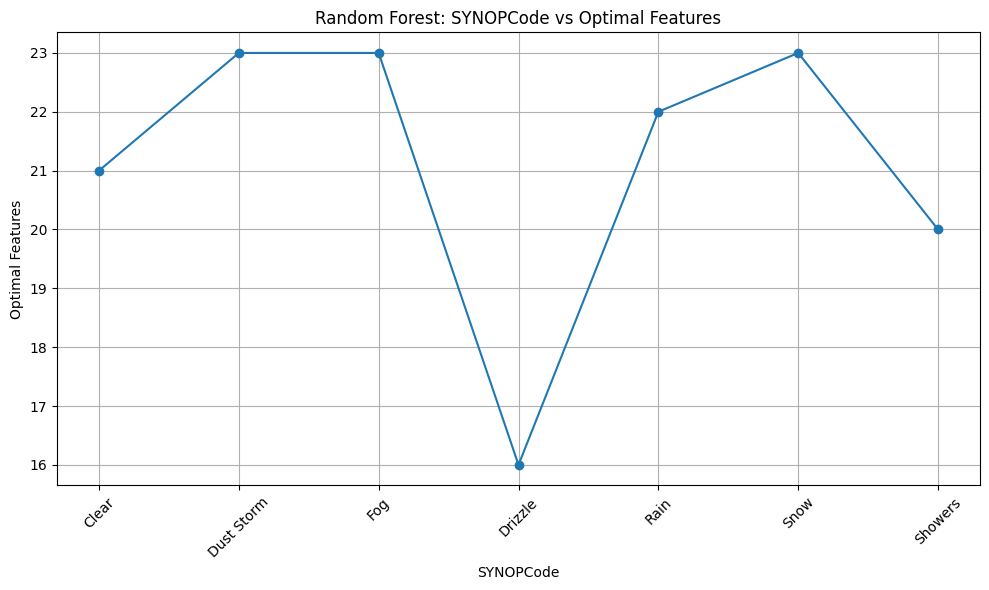

In [11]:
# Define weather descriptions for SYNOPCodes
weather_descriptions = {
    0: "Clear",
    3: "Dust Storm",
    4: "Fog",
    5: "Drizzle",
    6: "Rain",
    7: "Snow",
      8: "Showers"
  }

# Replace SYNOPCode with descriptions for plotting
final_comb_results_df ['Weather'] = final_comb_results_df['SYNOPCode'].map(weather_descriptions)
# Plotting SYNOPCode vs Optimal_Features
plt.figure(figsize=(10, 6))
plt.plot(final_comb_results_df['Weather'], final_comb_results_df['Optimal_Features'], marker='o', linestyle='-')
plt.title('Random Forest: SYNOPCode vs Optimal Features')
plt.xlabel('SYNOPCode')
plt.ylabel('Optimal Features')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

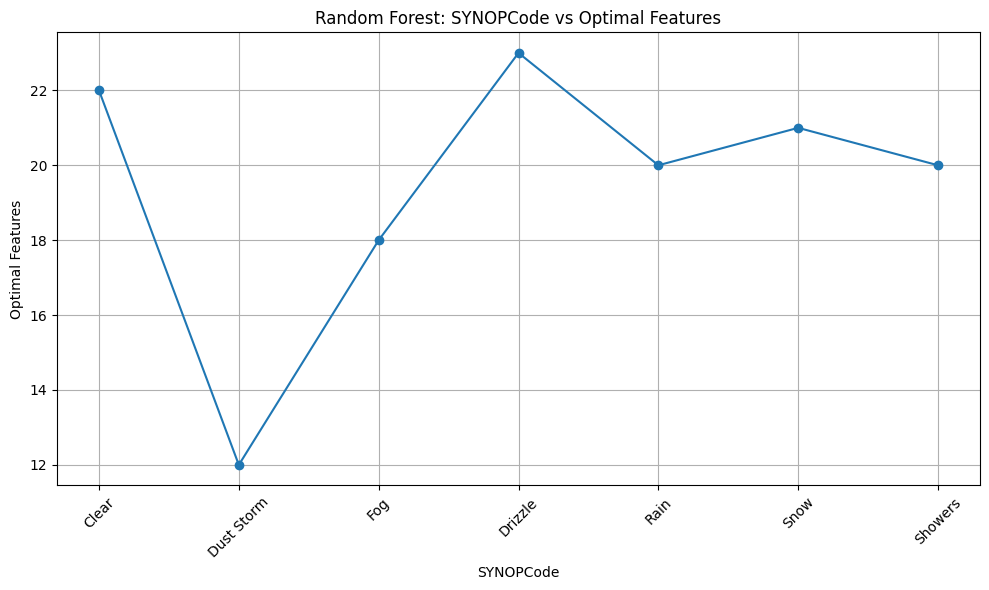

In [12]:
# Replace SYNOPCode with descriptions for plotting
final_comb_results_df1['Weather'] = final_comb_results_df1['SYNOPCode'].map(weather_descriptions)
# Plotting SYNOPCode vs Optimal_Features
plt.figure(figsize=(10, 6))
plt.plot(final_comb_results_df1['Weather'], final_comb_results_df1['Optimal_Features'], marker='o', linestyle='-')
plt.title('Random Forest: SYNOPCode vs Optimal Features')
plt.xlabel('SYNOPCode')
plt.ylabel('Optimal Features')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

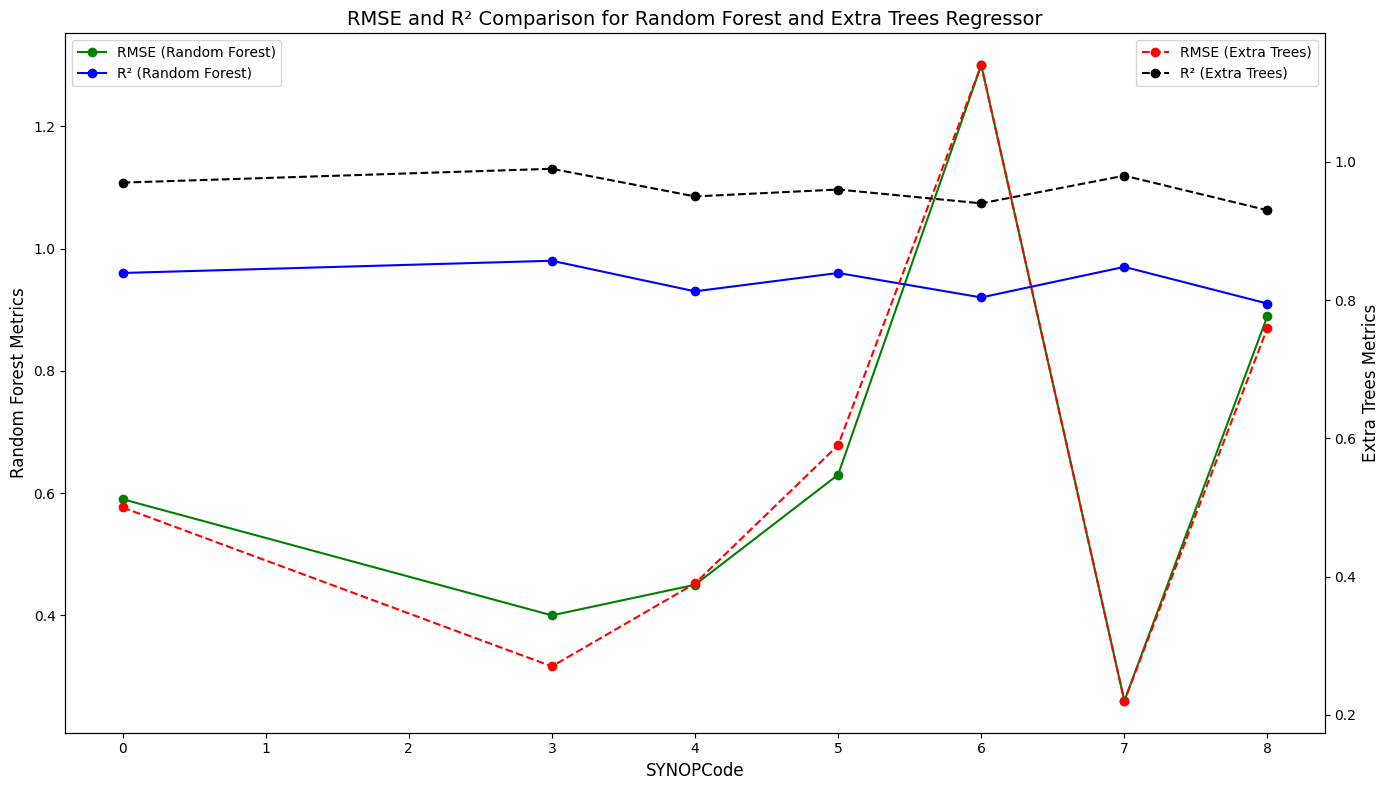

In [13]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot RMSE and R2 for Random Forest Regressor
ax1.plot(final_comb_results_df['SYNOPCode'], final_comb_results_df['Optimal_RMSE'],
         color='green', marker='o', label='RMSE (Random Forest)')
ax1.plot(final_comb_results_df['SYNOPCode'], final_comb_results_df['Optimal_R2'],
         color='blue', marker='o', label='R² (Random Forest)')
ax1.set_xlabel('SYNOPCode', fontsize=12)
ax1.set_ylabel('Random Forest Metrics', fontsize=12)
ax1.tick_params(axis='y')

# Create a second y-axis for Extra Trees metrics
ax2 = ax1.twinx()
ax2.plot(final_comb_results_df1['SYNOPCode'], final_comb_results_df1['Optimal_RMSE'],
         color='red', marker='o', linestyle='--', label='RMSE (Extra Trees)')
ax2.plot(final_comb_results_df1['SYNOPCode'], final_comb_results_df1['Optimal_R2'],
         color='black', marker='o', linestyle='--', label='R² (Extra Trees)')
ax2.set_ylabel('Extra Trees Metrics', fontsize=12)
ax2.tick_params(axis='y')

# Add title and legend
plt.title('RMSE and R² Comparison for Random Forest and Extra Trees Regressor', fontsize=14)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotate x-axis labels to 45 degrees for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adjust layout to fit everything
plt.tight_layout()


Best Group RFL_att Model is the Extra trees Regressor